# Ising Model: Metropolis Algorithm

The following code runs the metropolis algorithm for the Ising Model. Info about the Metropolis Algorithm can be found here: https://en.wikipedia.org/wiki/Metropolis–Hastings_algorithm

Info on the Ising Model: https://en.wikipedia.org/wiki/Ising_model

Energy per site: -1.112
Magnetization per site: 0.088
Specific heat: 413.855
Susceptibility: 21.650


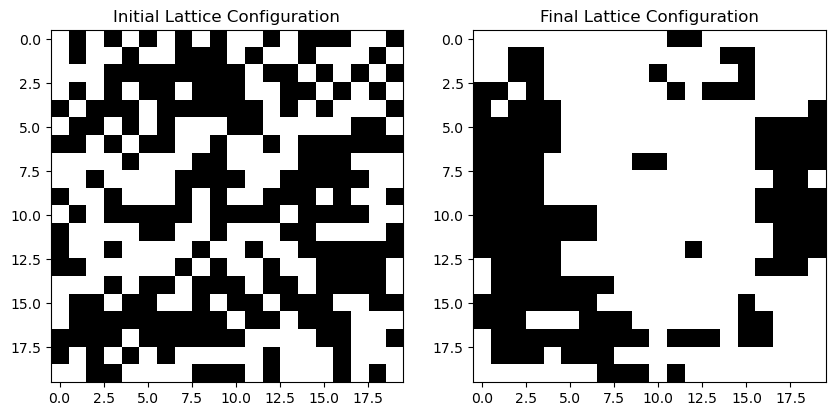

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

def compute_energy(lattice, J=1, H=0):
    energy = 0
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1) % L, j] + lattice[i, (j+1) % L] + lattice[(i-1) % L, j] + lattice[i, (j-1) % L]
            energy += -J * S * neighbors
    energy -= H * np.sum(lattice)  #contribution of the external field
    return energy/2  #counting each bond twice

def metropolis_step(lattice, beta, J=1, H=0):
    L = lattice.shape[0]
    for n in range(L*L):
        i, j = np.random.randint(0, L, size=2)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1) % L] + lattice[(i-1) % L, j] + lattice[i, (j-1) % L]
        dE = 2 * J * S * neighbors + 2 * H * S  #including the magnetic field term
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i, j] *= -1

def simulate(L, T, steps, equilibration_steps, H=0):
    beta = 1 / T
    lattice = initialize_lattice(L)
    initial_lattice = np.copy(lattice)
    energies = []
    magnetizations = []
    
    for n in range(equilibration_steps):
        metropolis_step(lattice, beta, H=H)

    for n in range(steps):
        metropolis_step(lattice, beta, H=H)
        energy = compute_energy(lattice, H=H)
        magnetization = np.sum(lattice) / (L * L)
        energies.append(energy)
        magnetizations.append(magnetization)
    
    #thermodynamic properties
    E_mean = np.mean(energies)
    M_mean = np.mean(magnetizations)
    C = beta**2 * np.var(energies)
    X = beta*np.var(magnetizations)*L**2
    
    return E_mean/(L*L), M_mean, C, X, initial_lattice, lattice


L = 20  #lattice size
T = 2.5  #temperature
steps = 5000
equi_steps = 2000
H = 0.0  #value of the external field

E, M, C, X, initial_lattice, final_lattice = simulate(L, T, steps, equi_steps, H)


print(f"Energy per site: {E:.3f}")
print(f"Magnetization per site: {M:.3f}")
print(f"Specific heat: {C:.3f}")
print(f"Susceptibility: {X:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(initial_lattice, cmap='gray')
ax[0].set_title("Initial Lattice Configuration")
ax[1].imshow(final_lattice, cmap='gray')
ax[1].set_title("Final Lattice Configuration")
plt.show()

White cells correspond to an up spin and the black cells correspond to a down spin. We can see that there are domains that form in the lattice due to the spin interactions. Increasing the temperature should give us more domains as the thermal agitation increases.

Energy per site: -0.412
Magnetization per site: 0.002
Specific heat: 35.629
Susceptibility: 0.508


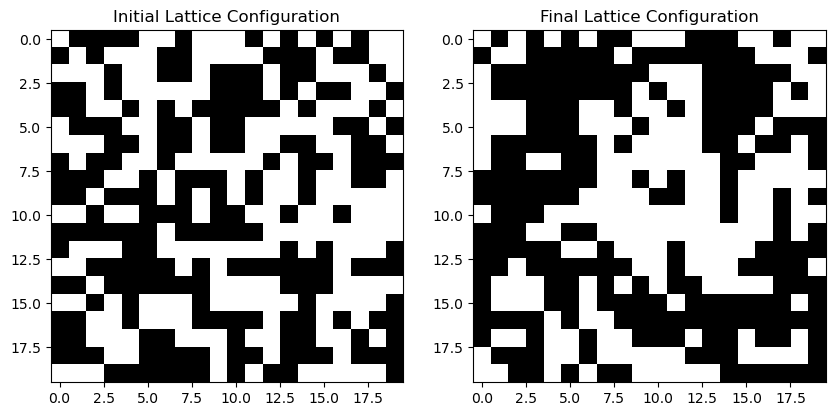

In [2]:
T = 5.2  #increased temperature

E, M, C, X, initial_lattice, final_lattice = simulate(L, T, steps, equi_steps, H)


print(f"Energy per site: {E:.3f}")
print(f"Magnetization per site: {M:.3f}")
print(f"Specific heat: {C:.3f}")
print(f"Susceptibility: {X:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(initial_lattice, cmap='gray')
ax[0].set_title("Initial Lattice Configuration")
ax[1].imshow(final_lattice, cmap='gray')
ax[1].set_title("Final Lattice Configuration")
plt.show()

There are many more domains in the lattice albeit domains of smaller size. Increasing the temperature above what's known as the curie temperature will produce so many domains that they are no longer effectively domains consisting of just one or two spins. This is spoken from a mathematical limiting case point of view. Physically speaking, thermal agitation is much higher than the spins ability to interact with each other so each spin just independantly changes from up or down when it wishes unbothered.

Energy per site: -0.032
Magnetization per site: -0.000
Specific heat: 0.221
Susceptibility: 0.018


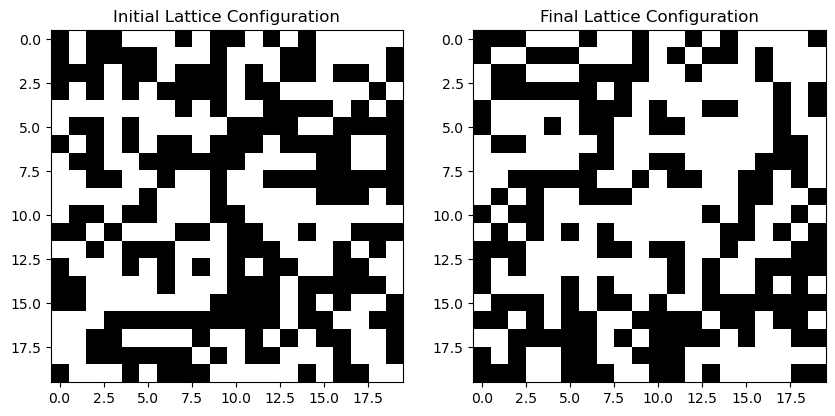

In [3]:
T = 60.2  #likely above curie temperature

E, M, C, X, initial_lattice, final_lattice = simulate(L, T, steps, equi_steps, H)


print(f"Energy per site: {E:.3f}")
print(f"Magnetization per site: {M:.3f}")
print(f"Specific heat: {C:.3f}")
print(f"Susceptibility: {X:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(initial_lattice, cmap='gray')
ax[0].set_title("Initial Lattice Configuration")
ax[1].imshow(final_lattice, cmap='gray')
ax[1].set_title("Final Lattice Configuration")
plt.show()

In the presence of a magnetic field, the spins align and the domains come together to form one big domain that spans across the solid. The solid is effectively magnetized. 

Energy per site: -2.073
Magnetization per site: 0.926
Specific heat: 172.899
Susceptibility: 0.099


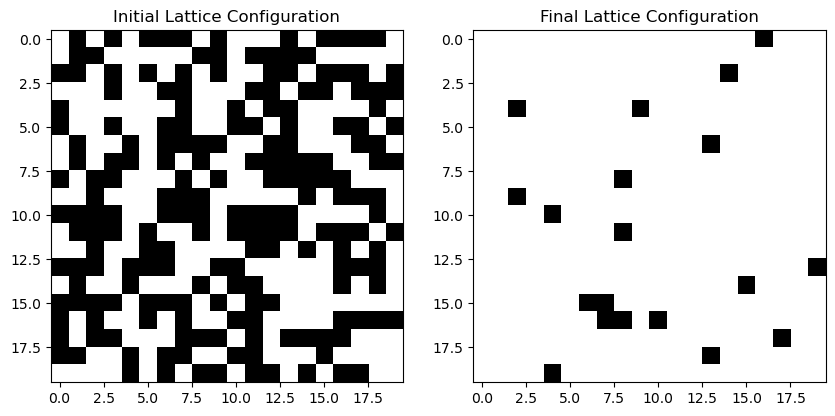

In [5]:
T = 2.5
H = 0.7

E, M, C, X, initial_lattice, final_lattice = simulate(L, T, steps, equi_steps, H)


print(f"Energy per site: {E:.3f}")
print(f"Magnetization per site: {M:.3f}")
print(f"Specific heat: {C:.3f}")
print(f"Susceptibility: {X:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(initial_lattice, cmap='gray')
ax[0].set_title("Initial Lattice Configuration")
ax[1].imshow(final_lattice, cmap='gray')
ax[1].set_title("Final Lattice Configuration")
plt.show()

Most sites have aligned to the field as can be seen in the plot. 